In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#dimensionality reduction on input features using Singular Value Decomposition (SVD)
#It Extracts only significant features

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial


In [4]:
df = pd.read_csv('datasets/scaled_data.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [6]:
FEATURES = list(df.columns[:-1])
FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [7]:
LABEL = 'Outcome'

In [8]:
def build_model(n_components):
    X = df[FEATURES]
    y = df[LABEL]

    fa_obj = FactorAnalysis(n_components=n_components, random_state=10, max_iter=10000)

    x_new = fa_obj.fit_transform(X,y)
    X = pd.DataFrame(x_new)

    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

    model = LogisticRegression(solver='liblinear', max_iter=1000)

    model.fit(x_train,y_train)

    y_pred = model.predict(x_test)


    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})


    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    return { 'fact_a_object': fa_obj,
             'transform_x': X,
             'accuracy': acc,
             'precision': prec,
             'recall': recall
           }

######
def compare_results(result_dict):

    for key in result_dict:
        print('TEST:', key)

        print()
        print('accuracy_score', result_dict[key]['accuracy'])
        print('precision_score', result_dict[key]['precision'])
        print('recall_score', result_dict[key]['recall'])
        print()

#####
def visualize_results(result_dict):
    n_components = list(range(0,8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize=(12,10))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Percision')
    plt.plot(n_components, recall, label='Recall')

    plt.xlabel('n_compontents')
    plt.ylabel('score')

    plt.legend()
    plt.show()

In [9]:
result_dict = {}
for i in range(1,9):
    result_dict['n_components - ' + str(i) ] = build_model(i)

In [10]:
compare_results(result_dict)

TEST: n_components - 1

accuracy_score 0.6883116883116883
precision_score 0.7333333333333333
recall_score 0.2

TEST: n_components - 2

accuracy_score 0.7467532467532467
precision_score 0.6153846153846154
recall_score 0.35555555555555557

TEST: n_components - 3

accuracy_score 0.6818181818181818
precision_score 0.6896551724137931
recall_score 0.3333333333333333

TEST: n_components - 4

accuracy_score 0.7857142857142857
precision_score 0.8181818181818182
recall_score 0.5

TEST: n_components - 5

accuracy_score 0.7597402597402597
precision_score 0.6458333333333334
recall_score 0.6078431372549019

TEST: n_components - 6

accuracy_score 0.7727272727272727
precision_score 0.6730769230769231
recall_score 0.660377358490566

TEST: n_components - 7

accuracy_score 0.8051948051948052
precision_score 0.775
recall_score 0.5961538461538461

TEST: n_components - 8

accuracy_score 0.7337662337662337
precision_score 0.7333333333333333
recall_score 0.4



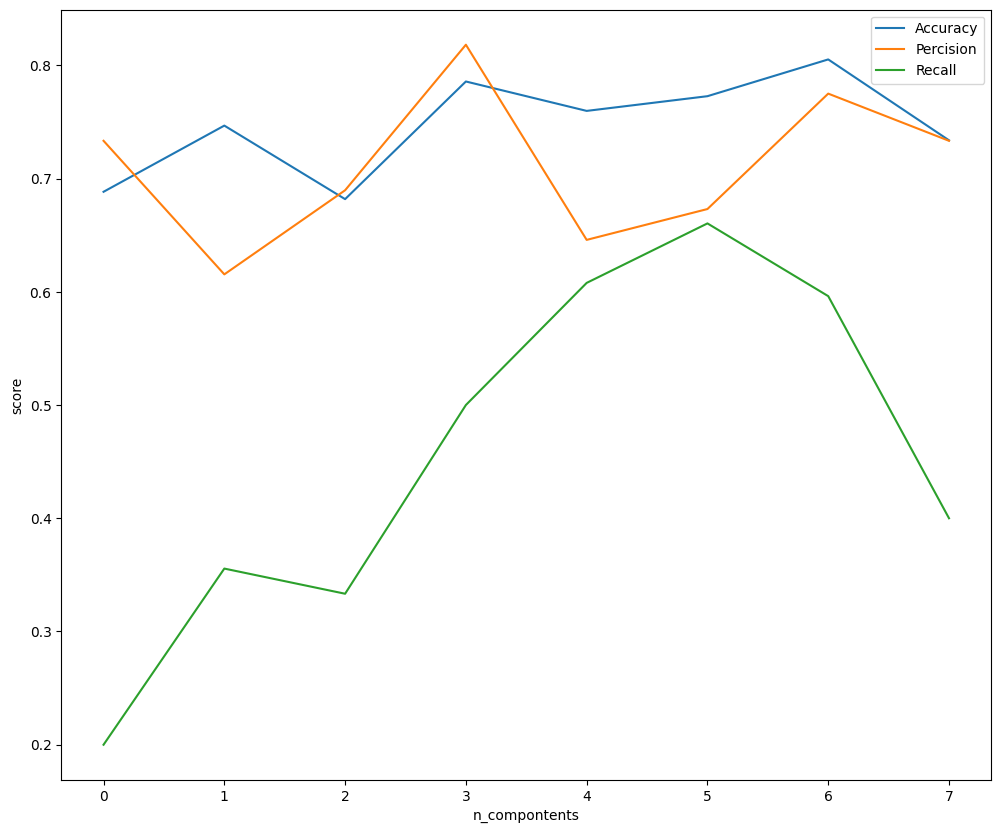

In [11]:
visualize_results(result_dict)